# https://arxiv.org/pdf/1904.02323

# https://fredhohman.com/summit

# https://github.com/fredhohman/summit

# https://fredhohman.com/slides/19-summit-vast-slides.pdf

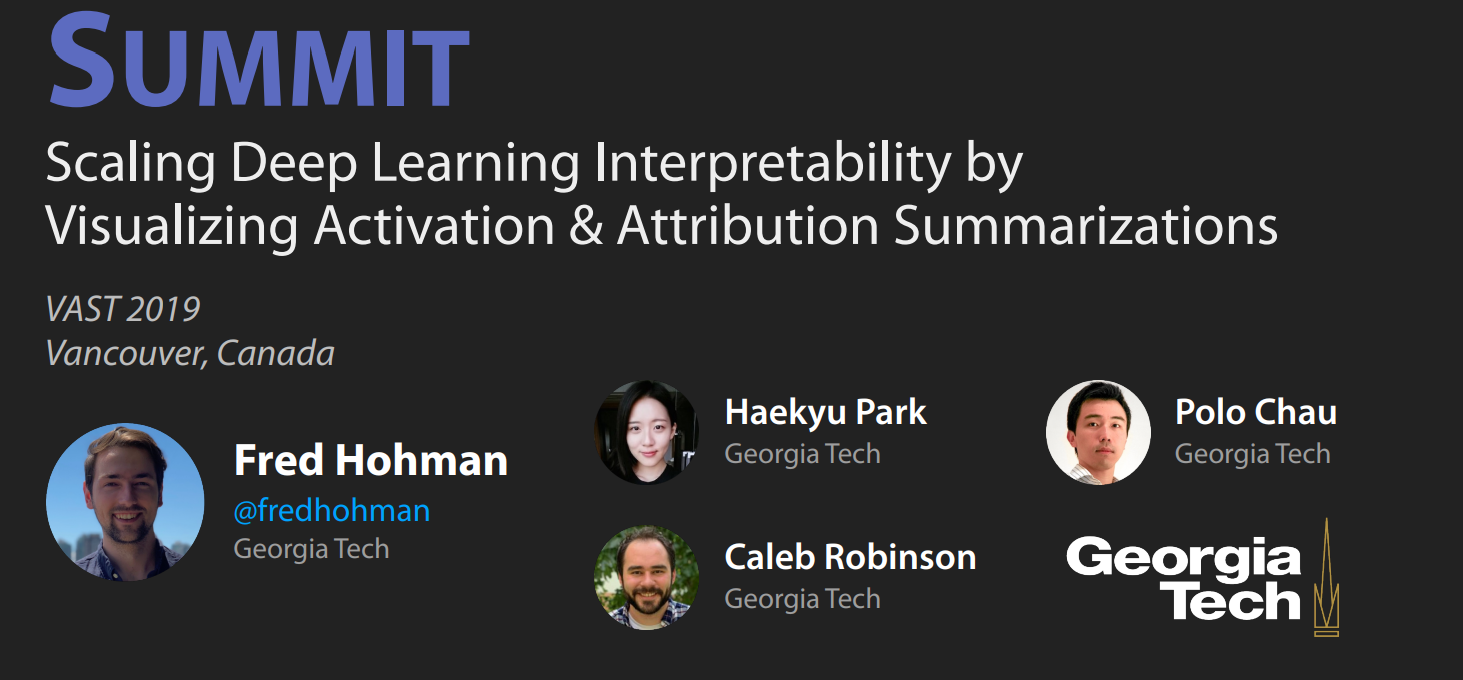

# SUMMIT: Scaling Deep Learning Interpretability by Visualizing Activation and Attribution Summarizations

## Abstract

The paper introduces **SUMMIT**, an interactive visual analytics system designed to scale deep learning interpretability from individual neurons or images to entire classes and datasets. SUMMIT achieves this by aggregating neuron activations and inter-layer influences across large datasets, constructing **attribution graphs** that summarize what features a neural network has learned and how those features interact to produce predictions. The system is demonstrated on large-scale image classifiers and enables the discovery of non-obvious learned associations, biases, and representational structures that are otherwise difficult to detect.

---

## Problems

### Limited Scope of Existing Interpretability Methods
Prior interpretability techniques largely focus on single images, individual neurons, or local explanations, failing to capture how representations emerge at the class or dataset level.

### Lack of Scalable Summarization
Modern neural networks contain hundreds of thousands of neurons trained on millions of samples, making exhaustive visualization or inspection infeasible.

### Missing Representation of Inter-Neuron Relationships
Most methods identify important neurons but do not reveal how neurons interact across layers to form higher-level concepts.

### High Barrier to Access and Exploration
Understanding large neural networks typically requires specialized computational resources and expert knowledge, limiting broader engagement.

---

## Proposed Solutions

The paper proposes **SUMMIT**, which introduces two core summarization techniques:

### Activation Aggregation
Identifies neurons that consistently activate strongly across all images of a given class, yielding a class-level summary of important features.

### Neuron-Influence Aggregation
Quantifies and aggregates how neurons in one layer influence neurons in subsequent layers, capturing inter-layer dependencies.

These are combined into a novel representation:

### Attribution Graphs
Graph-based summaries where nodes represent important neurons and edges represent influential connections, extracted using graph algorithms such as **Personalized PageRank**.

---

## Purpose

The primary purpose of the work is to enable scalable, human-centered interpretability of deep neural networks by:

- Revealing what features a model has learned at the class level.  
- Explaining how low-level features combine into high-level concepts.  
- Supporting model debugging, bias detection, and hypothesis testing.  
- Making interpretability accessible through an interactive, web-based system.  

---

## Methodology

### Model and Data Scope
The approach is demonstrated on a large convolutional neural network trained on a million-image dataset.

### Activation Aggregation
For each class and layer, the method records channels with the strongest activations across all class images, producing **class–channel importance matrices**.

### Influence Aggregation
For each pair of adjacent layers, the method computes how strongly channels in earlier layers contribute to channels in later layers via convolutional operations.

### Attribution Graph Construction
Aggregated activations and influences are combined into a directed graph representing the entire network. **Personalized PageRank** is applied to extract the most relevant subgraph for each class.

### Interactive Visualization
The system provides multiple coordinated views (class embedding, class sidebar, attribution graph) that allow users to explore, compare, and filter class representations interactively.

---

## Results

Using SUMMIT, the authors demonstrate that:

- Neural networks often rely on unexpected or spurious features, such as human-related features for animal classification, revealing dataset biases.  
- Some classes exhibit mixed semantic representations that shift across layers, reflecting hierarchical feature composition.  
- Closely related classes can be distinguished by specific high-level features that align, in some cases, with human intuition.  
- Certain neurons consistently detect non-semantic artifacts, which can be identified and excluded to improve interpretability.  
- Attribution graphs provide actionable insights that can inform future architecture and training design.  

---

## Conclusions

The paper concludes that scalable interpretability requires moving beyond local explanations toward class- and dataset-level representations. **SUMMIT** demonstrates that aggregating activations and influences into attribution graphs enables meaningful, high-level understanding of deep neural networks. By making these representations interactive and accessible, the work advances interpretability as a practical tool for model analysis, debugging, and design, and lays the foundation for future research in human-centered explainable AI.


# Mathematical Foundations of SUMMIT

## 1. Neural Network as a Mathematical Function

At its core, the paper treats a deep neural network as a **compositional function**:

$$
f(x) = f_L \circ f_{L-1} \circ \cdots \circ f_1(x)
$$

where:

- $$x$$ is an input image,  
- each $$f_l$$ is a layer-wise transformation (e.g., convolution, nonlinearity),  
- intermediate outputs are **activations**.

### Role in the Paper
This formulation motivates analyzing **internal representations**—activations and their interactions—rather than focusing solely on final predictions.

---

## 2. Convolutional Activations as Feature Maps

For a convolutional layer $$l$$:

$$
X \in \mathbb{R}^{H \times W \times C_{l-1}}, \quad
Y \in \mathbb{R}^{H \times W \times C_l}
$$

Each output channel is computed as:

$$
Y_{:,:,j} = X * K^{(j)} = \sum_{i=1}^{C_{l-1}} X_{:,:,i} * K^{(j)}_{:,:,i}
$$

where:

- $$K^{(j)}$$ is the kernel producing channel $$j$$,  
- $$*$$ denotes convolution.

### Interpretation
Each channel acts as a **learned feature detector**. The paper assumes channels correspond to semantically meaningful concepts.

---

## 3. Activation Aggregation (Class-Level Statistics)

### 3.1 Global Max Pooling

For each image $$i$$ and channel $$j$$ in layer $$l$$:

$$
Z^{l}_{ij} = \max_{h,w} Y^{l}_{i,h,w,j}
$$

**Why max pooling?**  
The maximum captures **presence strength** of a feature rather than its frequency or average magnitude.

---

### 3.2 Aggregated Activation Matrix

For a class $$c$$ and channel $$j$$:

$$
A^{l}_{cj} = \text{number of images in class } c \text{ where channel } j \text{ is highly activated}
$$

Two selection strategies are discussed:

- **Top-\(k\)** selection (fixed count),
- **Top-percentage by cumulative weight** (adaptive).

The paper adopts the second approach due to **power-law activation distributions**.

### Role
This step compresses millions of activations into a compact **class–feature frequency matrix**.

---

## 4. Influence Between Layers (Attribution via Convolution)

### 4.1 Channel Influence Definition

The influence of channel $$i$$ in layer $$l-1$$ on channel $$j$$ in layer $$l$$ for one image is defined as:

$$
L^{l}_{ij} = \max \left( X_{:,:,i} * K^{(j)}_{:,:,i} \right)
$$

This extracts a scalar influence score from a 2D feature map.

**Why max again?**  
The focus is on the **strongest causal contribution**, not total activation energy.

---

### 4.2 Aggregated Influence Tensor

For class $$c$$:

$$
I^{l}_{cij} = \text{count of images where } i \rightarrow j \text{ is among top influences}
$$

This forms a 3D tensor indexed by:

- class $$c$$,
- source channel $$i$$,
- target channel $$j$$.

### Role
Encodes how features are **hierarchically composed** across layers.

---

## 5. Graph-Theoretic Formulation

### 5.1 Neural Network as a Directed Graph

- **Vertices:** channels (neurons),  
- **Edges:** strong inter-layer influences,  
- **Edge weights:** frequency of influence across images.

The network is thus represented as a **weighted directed acyclic graph (DAG)**.

---

### 5.2 Personalized PageRank

To extract a class-specific subgraph, Personalized PageRank is applied:

$$
\pi = \alpha v + (1 - \alpha) P^\top \pi
$$

where:

- $$v$$ is the personalization vector (derived from $$A^l$$),  
- $$P$$ is the transition matrix (derived from $$I^l$$),  
- $$\pi$$ represents node importance scores.

### Interpretation
A channel is important if it:

- activates frequently, and  
- lies on influential inter-layer paths.

This mathematically fuses **node importance** and **edge structure**.

---

## 6. Power-Law Distributions

Empirically, both:

- channel activations, and  
- PageRank scores  

follow **heavy-tailed (power-law-like)** distributions.

### Consequence
Only a small fraction of channels dominate, justifying **cumulative-percentage thresholding**.

---

## 7. Dimensionality Reduction (UMAP)

The class–activation matrix $$A^l$$ is embedded into 2D using **UMAP**, which preserves:

- local neighborhoods,  
- global structure more effectively than linear methods.

### Role
Provides a **statistical similarity map** of class representations.

---

## 8. Similarity Metrics

### Cosine Similarity

For two classes $$c_1$$ and $$c_2$$:

$$
\mathrm{sim}(c_1, c_2) =
\frac{A_{c_1} \cdot A_{c_2}}
{\|A_{c_1}\| \, \|A_{c_2}\|}
$$

### Purpose
Quantifies **representational similarity** between classes.

---

## 9. Thresholding and Hyperparameters

Key parameters include:

- percentage of top activations per image,  
- number of influential channels per layer,  
- PageRank score cutoff.

The authors demonstrate **stability at scale**, reducing sensitivity to precise values.

---

## 10. Statistical Nature of the Method

Notably, SUMMIT involves:

- no retraining,  
- no probabilistic modeling,  
- no hypothesis testing.

Instead, it is:

- descriptive,  
- frequency-based,  
- aggregation-driven.

---

## Final Mathematical Insight

Mathematically, SUMMIT performs:

- max-based feature detection,  
- frequency aggregation across datasets,  
- graph construction from convolution algebra,  
- importance propagation via PageRank,  
- dimensionality reduction for visualization.

Together, these steps transform a high-dimensional neural network into a **tractable, interpretable, class-level mathematical object**.


## Key Problems, Limitations of Prior Work, and SUMMIT’s Proposed Solutions

| Key Problem / Research Gap | How It Limits Prior Work | How the Paper Proposes to Solve It |
|----------------------------|--------------------------|------------------------------------|
| Explanations are typically instance-level (single image or single neuron), not class- or dataset-level | Single-image explanations do not reliably capture what a model has learned in general for a class. Inspecting many images is tedious and still risks missing shared patterns and global structure. | Build **class-level representations** by aggregating evidence across all images in a class, rather than explaining one instance at a time. |
| Lack of tools that simultaneously reveal important neurons and their relationships | Methods that identify important activations omit how features combine through the network, while methods that show structure may not scale or require heavy computation or sampling. | Introduce two scalable summarization techniques—**activation aggregation** (important neurons) and **neuron-influence aggregation** (relationships)—and combine them into a unified **attribution graph** that exposes both what is important and how it interacts. |
| Scalability: extending explanations from a few examples to entire classes or datasets | Manual comparison across many images is slow and fragile, and representative class concepts are difficult to identify reliably. | Use **activation aggregation**: compute per-image channel maxima via global max pooling, select top channels per image, and aggregate frequencies across a class using an adaptive top-percentage strategy. |
| Influence is non-trivial in CNNs: determining how earlier channels affect later channels | Unlike dense layers, convolutional influence is mediated by spatial kernels and feature maps, making causal attribution across layers difficult to quantify. | Apply **neuron-influence aggregation**: decompose convolutions into per-input-channel contributions, reduce each to a scalar influence (via max), and aggregate top influences across images for each class. |
| Need for a holistic visualization summarizing an entire class | Prior approaches may show many activations without connectivity, rely on sampling, or be computationally expensive, failing to provide a coherent class-level narrative of feature composition. | Construct **attribution graphs** where nodes are channels weighted by aggregated activations and edges are influential connections, then extract salient subgraphs using **Personalized PageRank** to capture class-specific structure. |
| Interaction challenge: exploring hundreds or thousands of learned class representations | Even with class summaries, users lack effective mechanisms for overview, comparison, search, and drill-down across many classes. | Provide an **interactive visual analytics system** with coordinated views: a low-dimensional class embedding, a searchable and sortable class list, and a detailed attribution graph for focused inspection. |
| Research access barrier: high computational and technical requirements | Many interpretability workflows require specialized hardware, complex pipelines, and expert setup, limiting broader participation. | Implement SUMMIT as a **web-based, open-source system** that runs in modern browsers, lowering the barrier to interacting with large models and interpretability analyses. |


In [1]:
# SUMMIT-style Interpretability Lab

import os, math, random, time
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, Subset
import torchvision
import torchvision.transforms as T
import matplotlib.pyplot as plt

# Optional (used for embedding view and graphs)
from sklearn.manifold import TSNE
from sklearn.preprocessing import normalize
import networkx as nx

In [2]:
# -----------------------------
# 0) Reproducibility + device
# -----------------------------
seed = 7
random.seed(seed); np.random.seed(seed); torch.manual_seed(seed); torch.cuda.manual_seed_all(seed)
torch.backends.cudnn.deterministic = False
torch.backends.cudnn.benchmark = True

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Device:", device)

Device: cuda


In [3]:
# -----------------------------
# 1) Dataset: CIFAR-10
# -----------------------------
BATCH_SIZE = 128
TRAIN_SUBSET = 20000   # set None for full train set (50000)
TEST_SUBSET  = 5000    # set None for full test set (10000)

mean = (0.4914, 0.4822, 0.4465)
std  = (0.2470, 0.2435, 0.2616)

train_tf = T.Compose([
    T.RandomCrop(32, padding=4),
    T.RandomHorizontalFlip(),
    T.ToTensor(),
    T.Normalize(mean, std),
])
test_tf = T.Compose([
    T.ToTensor(),
    T.Normalize(mean, std),
])

train_ds = torchvision.datasets.CIFAR10(root="./data", train=True, download=True, transform=train_tf)
test_ds  = torchvision.datasets.CIFAR10(root="./data", train=False, download=True, transform=test_tf)
classes = train_ds.classes

if TRAIN_SUBSET is not None:
    idx = np.random.permutation(len(train_ds))[:TRAIN_SUBSET]
    train_ds = Subset(train_ds, idx)
if TEST_SUBSET is not None:
    idx = np.random.permutation(len(test_ds))[:TEST_SUBSET]
    test_ds = Subset(test_ds, idx)

train_loader = DataLoader(train_ds, batch_size=BATCH_SIZE, shuffle=True, num_workers=2, pin_memory=True)
test_loader  = DataLoader(test_ds, batch_size=BATCH_SIZE, shuffle=False, num_workers=2, pin_memory=True)

100%|██████████| 170M/170M [00:13<00:00, 12.6MB/s]


In [4]:
# -----------------------------
# 2) Model: Small CNN
# -----------------------------
class SmallCNN(nn.Module):
    def __init__(self, num_classes=10):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 32, 3, padding=1)   # layer 1
        self.conv2 = nn.Conv2d(32, 64, 3, padding=1)  # layer 2
        self.conv3 = nn.Conv2d(64, 128, 3, padding=1) # layer 3
        self.pool = nn.MaxPool2d(2, 2)
        self.bn1 = nn.BatchNorm2d(32)
        self.bn2 = nn.BatchNorm2d(64)
        self.bn3 = nn.BatchNorm2d(128)
        self.fc1 = nn.Linear(128 * 4 * 4, 256)
        self.fc2 = nn.Linear(256, num_classes)

    def forward(self, x, return_feats=False):
        feats = {}
        x = self.pool(F.relu(self.bn1(self.conv1(x))))
        feats["conv1"] = x              # [B,32,16,16]
        x = self.pool(F.relu(self.bn2(self.conv2(x))))
        feats["conv2"] = x              # [B,64,8,8]
        x = self.pool(F.relu(self.bn3(self.conv3(x))))
        feats["conv3"] = x              # [B,128,4,4]
        x = x.flatten(1)
        x = F.relu(self.fc1(x))
        logits = self.fc2(x)
        if return_feats:
            return logits, feats
        return logits

model = SmallCNN(num_classes=10).to(device)
print(model)

SmallCNN(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (bn1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn3): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc1): Linear(in_features=2048, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=10, bias=True)
)


In [5]:
# -----------------------------
# 3) Training setup
# -----------------------------
EPOCHS = 6
lr = 1e-3
optimizer = torch.optim.Adam(model.parameters(), lr=lr, weight_decay=1e-4)
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=EPOCHS)
criterion = nn.CrossEntropyLoss()

def accuracy_from_logits(logits, y):
    return (logits.argmax(1) == y).float().mean().item()

train_loss_hist, train_acc_hist = [], []
test_loss_hist, test_acc_hist = [], []

In [6]:
# -----------------------------
# 4) Train + Evaluate loop
# -----------------------------
def run_epoch(loader, training: bool):
    model.train(training)
    total_loss, total_acc, n = 0.0, 0.0, 0
    for xb, yb in loader:
        xb, yb = xb.to(device), yb.to(device)
        if training:
            optimizer.zero_grad(set_to_none=True)
        logits = model(xb)
        loss = criterion(logits, yb)
        if training:
            loss.backward()
            optimizer.step()

        bs = xb.size(0)
        total_loss += loss.item() * bs
        total_acc  += (logits.argmax(1) == yb).float().sum().item()
        n += bs
    return total_loss / n, total_acc / n

t0 = time.time()
for epoch in range(1, EPOCHS + 1):
    tr_loss, tr_acc = run_epoch(train_loader, training=True)
    te_loss, te_acc = run_epoch(test_loader, training=False)
    scheduler.step()

    train_loss_hist.append(tr_loss); train_acc_hist.append(tr_acc)
    test_loss_hist.append(te_loss);  test_acc_hist.append(te_acc)

    print(f"Epoch {epoch:02d}/{EPOCHS} | train loss {tr_loss:.4f} acc {tr_acc:.4f} | test loss {te_loss:.4f} acc {te_acc:.4f}")

print(f"Total time: {(time.time()-t0):.1f}s")

Epoch 01/6 | train loss 1.6648 acc 0.3790 | test loss 1.3710 acc 0.4780
Epoch 02/6 | train loss 1.2982 acc 0.5315 | test loss 1.1908 acc 0.5718
Epoch 03/6 | train loss 1.1360 acc 0.5972 | test loss 1.0841 acc 0.6182
Epoch 04/6 | train loss 1.0255 acc 0.6348 | test loss 0.9313 acc 0.6736
Epoch 05/6 | train loss 0.9343 acc 0.6719 | test loss 0.8690 acc 0.6920
Epoch 06/6 | train loss 0.8899 acc 0.6865 | test loss 0.8426 acc 0.6988
Total time: 30.5s


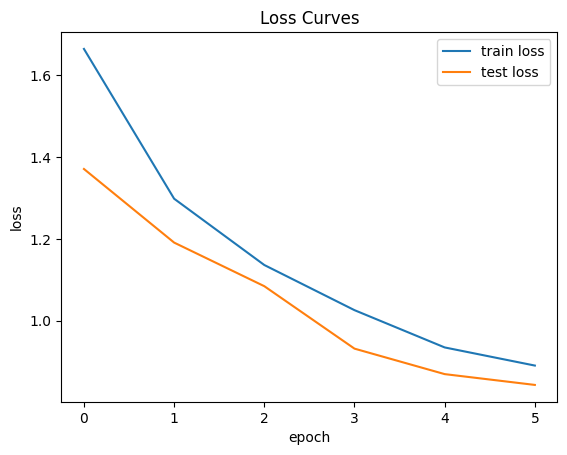

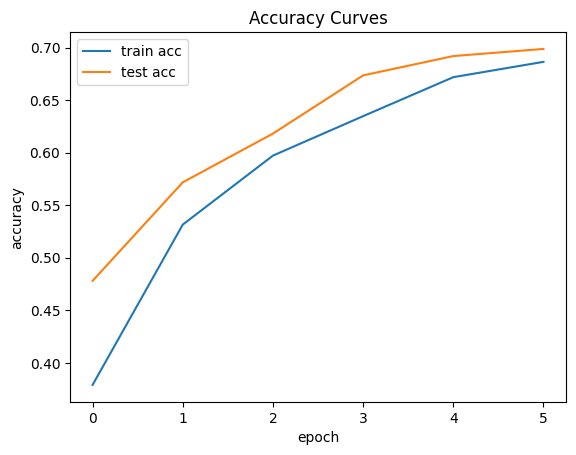

In [7]:
# -----------------------------
# 5) Visualize training curves (loss + accuracy)
# -----------------------------
plt.figure()
plt.plot(train_loss_hist, label="train loss")
plt.plot(test_loss_hist, label="test loss")
plt.xlabel("epoch"); plt.ylabel("loss"); plt.legend(); plt.title("Loss Curves")
plt.show()

plt.figure()
plt.plot(train_acc_hist, label="train acc")
plt.plot(test_acc_hist, label="test acc")
plt.xlabel("epoch"); plt.ylabel("accuracy"); plt.legend(); plt.title("Accuracy Curves")
plt.show()

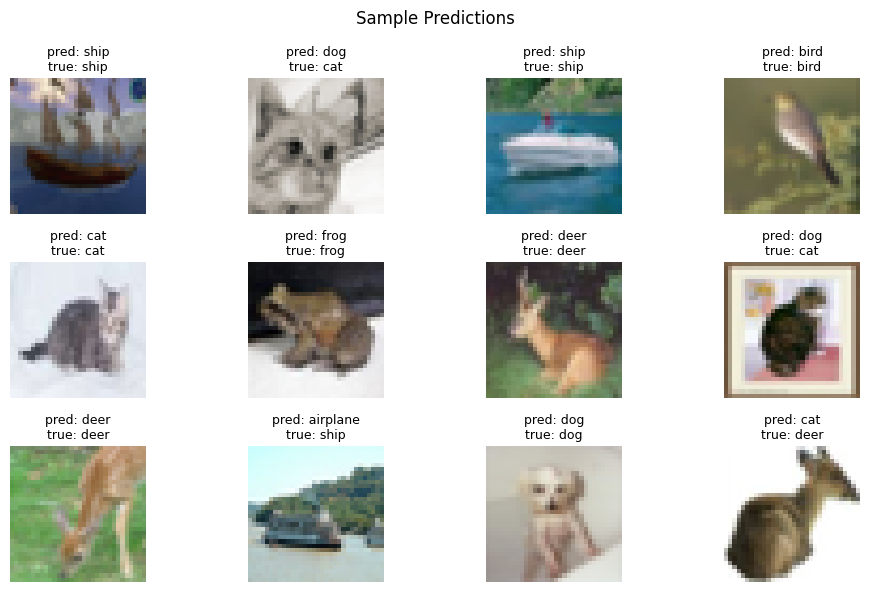

In [8]:
# -----------------------------
# 6) Prediction visualization (sample batch)
# -----------------------------
def denorm(x):
    # x: [3,H,W] normalized tensor -> numpy image in [0,1]
    x = x.detach().cpu().clone()
    for c in range(3):
        x[c] = x[c] * std[c] + mean[c]
    x = x.clamp(0, 1)
    return x.permute(1,2,0).numpy()

model.eval()
xb, yb = next(iter(test_loader))
xb, yb = xb.to(device), yb.to(device)
with torch.no_grad():
    logits = model(xb)
pred = logits.argmax(1)

# show first 12 images
plt.figure(figsize=(10,6))
for i in range(12):
    plt.subplot(3,4,i+1)
    plt.imshow(denorm(xb[i]))
    plt.axis("off")
    plt.title(f"pred: {classes[pred[i].item()]}\ntrue: {classes[yb[i].item()]}", fontsize=9)
plt.suptitle("Sample Predictions")
plt.tight_layout()
plt.show()

In [9]:
# -----------------------------
# 7) SUMMIT core: Activation Aggregation (class-level channel importance)
# -----------------------------
LAYER_NAMES = ["conv1", "conv2", "conv3"]
TOPK_ACT = 5                  # "top channels per image"
MAX_IMAGES_PER_CLASS = 400    # reduce for speed; increase for stability/quality

@torch.no_grad()
def collect_activation_aggregation(loader, layer_name: str):
    # Determine channels by a single forward pass
    model.eval()
    # Count matrix: A[class, channel]
    # We'll infer channel count after first batch
    A = None
    per_class_seen = {c: 0 for c in range(10)}

    for xb, yb in loader:
        xb, yb = xb.to(device), yb.to(device)
        logits, feats = model(xb, return_feats=True)
        act = feats[layer_name]  # [B, C, H, W]
        B, C, H, W = act.shape
        if A is None:
            A = torch.zeros((10, C), dtype=torch.int32)

        # channel max per image: [B, C]
        z = act.amax(dim=(2,3))

        # for each image, top-k channels by max activation
        topk_idx = torch.topk(z, k=min(TOPK_ACT, C), dim=1).indices  # [B, k]

        for i in range(B):
            c = int(yb[i].item())
            if per_class_seen[c] >= MAX_IMAGES_PER_CLASS:
                continue
            per_class_seen[c] += 1
            A[c, topk_idx[i].cpu()] += 1

        # early stop if all classes filled
        if all(per_class_seen[c] >= MAX_IMAGES_PER_CLASS for c in range(10)):
            break

    return A

A_by_layer = {}
for ln in LAYER_NAMES:
    A_by_layer[ln] = collect_activation_aggregation(test_loader, ln)
    print(f"Activation aggregation computed for {ln}: shape {tuple(A_by_layer[ln].shape)}")

Activation aggregation computed for conv1: shape (10, 32)
Activation aggregation computed for conv2: shape (10, 64)
Activation aggregation computed for conv3: shape (10, 128)


In [10]:
# -----------------------------
# 8) SUMMIT core: Influence Aggregation (class-level inter-layer influences)
# -----------------------------
TOPK_INFL = 5                # top influential source channels per target channel
MAX_BATCHES_INFL = 25        # speed control

def get_conv_module(layer_name: str):
    return getattr(model, layer_name)

@torch.no_grad()
def influence_aggregation(loader, prev_layer: str, next_layer: str, A_next: torch.Tensor):
    model.eval()
    conv_next = get_conv_module(next_layer)  # nn.Conv2d
    W = conv_next.weight.detach().to(device) # [C_out, C_in, k, k]

    C_out, C_in, kH, kW = W.shape
    I = torch.zeros((10, C_in, C_out), dtype=torch.int32)  # I[class, i, j]
    per_class_seen = {c: 0 for c in range(10)}

    # For speed: choose target channels likely important for each class based on A_next
    # We take, per class, a small set of target channels = top-N by activation count
    TARGETS_PER_CLASS = 16
    top_targets = {}
    for c in range(10):
        top_targets[c] = torch.topk(A_next[c].float(), k=min(TARGETS_PER_CLASS, C_out)).indices.cpu().tolist()

    batches = 0
    for xb, yb in loader:
        xb, yb = xb.to(device), yb.to(device)
        logits, feats = model(xb, return_feats=True)

        # NOTE: feats store activations AFTER pooling+relu+bn; this is fine for teaching.
        prev_act = feats[prev_layer]  # [B, C_in, H, W]

        B, Cin, H, W_ = prev_act.shape
        # We will compute influences per image, for a limited number of targets
        for bi in range(B):
            c = int(yb[bi].item())
            if per_class_seen[c] >= MAX_IMAGES_PER_CLASS:
                continue
            per_class_seen[c] += 1

            x_prev = prev_act[bi:bi+1]  # [1, Cin, H, W]
            # For each chosen target channel j, compute influence of each source i
            for j in top_targets[c]:
                # Compute per-source contributions via grouped conv trick:
                # We want conv2d(x_prev[:, i], W[j, i]) for each i separately.
                # We'll do it in a loop for clarity (educational), since Cin is modest.
                infl = torch.empty((Cin,), device=device)
                for i in range(Cin):
                    # x_prev[:, i:i+1] convolved with W[j, i:i+1]
                    contrib = F.conv2d(x_prev[:, i:i+1], W[j:j+1, i:i+1], padding=kH//2)
                    infl[i] = contrib.amax()
                # record top influential sources
                top_i = torch.topk(infl, k=min(TOPK_INFL, Cin)).indices.detach().cpu()
                I[c, top_i, j] += 1

        batches += 1
        if batches >= MAX_BATCHES_INFL:
            break
        if all(per_class_seen[c] >= MAX_IMAGES_PER_CLASS for c in range(10)):
            break

    return I

# Compute influence aggregation for conv1->conv2 and conv2->conv3
I_12 = influence_aggregation(test_loader, "conv1", "conv2", A_by_layer["conv2"])
I_23 = influence_aggregation(test_loader, "conv2", "conv3", A_by_layer["conv3"])
print("Influence aggregation computed: I_12", tuple(I_12.shape), "I_23", tuple(I_23.shape))

Influence aggregation computed: I_12 (10, 32, 64) I_23 (10, 64, 128)


In [11]:
# -----------------------------
# 9) Attribution Graph: build class-specific graph + Personalized PageRank
# -----------------------------

TARGET_CLASS_NAME = "tench"  # for CIFAR-10 this won't exist; we'll map to a valid class below
# Choose a CIFAR-10 class
target_class = classes.index("cat") if "cat" in classes else 0
print("Chosen class:", target_class, classes[target_class])

def node_id(layer, ch):  # unique string id
    return f"{layer}:{ch}"

def build_class_graph(c):
    G = nx.DiGraph()

    # Add nodes with personalization weights from A
    for ln in LAYER_NAMES:
        A = A_by_layer[ln][c].float()
        A = A / (A.max() + 1e-8)  # normalize to [0,1] (layer-wise normalization idea)
        for ch in range(A.numel()):
            nid = node_id(ln, ch)
            G.add_node(nid, layer=ln, ch=ch, act=float(A[ch].item()))

    # Add edges with weights from influence aggregations (counts)
    # conv1 -> conv2
    I = I_12[c].float()  # [C1, C2]
    for i in range(I.shape[0]):
        for j in range(I.shape[1]):
            w = float(I[i, j].item())
            if w > 0:
                G.add_edge(node_id("conv1", i), node_id("conv2", j), weight=w)

    # conv2 -> conv3
    I = I_23[c].float()  # [C2, C3]
    for i in range(I.shape[0]):
        for j in range(I.shape[1]):
            w = float(I[i, j].item())
            if w > 0:
                G.add_edge(node_id("conv2", i), node_id("conv3", j), weight=w)

    return G

G_full = build_class_graph(target_class)
print("Full class graph:", G_full.number_of_nodes(), "nodes,", G_full.number_of_edges(), "edges")

# Personalized PageRank vector v: use node attribute 'act' (activation aggregation) as personalization
personalization = {n: (G_full.nodes[n].get("act", 0.0) + 1e-6) for n in G_full.nodes()}
# PageRank using edge weights
pr = nx.pagerank(G_full, alpha=0.85, personalization=personalization, weight="weight", max_iter=200)

# Extract top nodes per layer by cumulative mass (paper uses power-law motivated thresholds)
KEEP_PER_LAYER = 0.12  # keep nodes until we accumulate this fraction of PR mass per layer
selected_nodes = set()
for ln in LAYER_NAMES:
    nodes_ln = [n for n in G_full.nodes() if G_full.nodes[n]["layer"] == ln]
    nodes_ln_sorted = sorted(nodes_ln, key=lambda n: pr[n], reverse=True)
    total_mass = sum(pr[n] for n in nodes_ln_sorted) + 1e-12
    cum = 0.0
    for n in nodes_ln_sorted:
        selected_nodes.add(n)
        cum += pr[n]
        if (cum / total_mass) >= KEEP_PER_LAYER:
            break

G_sub = G_full.subgraph(selected_nodes).copy()
# Remove isolated nodes for cleaner visualization
isolated = [n for n in G_sub.nodes() if G_sub.degree(n) == 0]
G_sub.remove_nodes_from(isolated)

print("Attribution subgraph:", G_sub.number_of_nodes(), "nodes,", G_sub.number_of_edges(), "edges")

Chosen class: 3 cat
Full class graph: 224 nodes, 568 edges
Attribution subgraph: 6 nodes, 6 edges


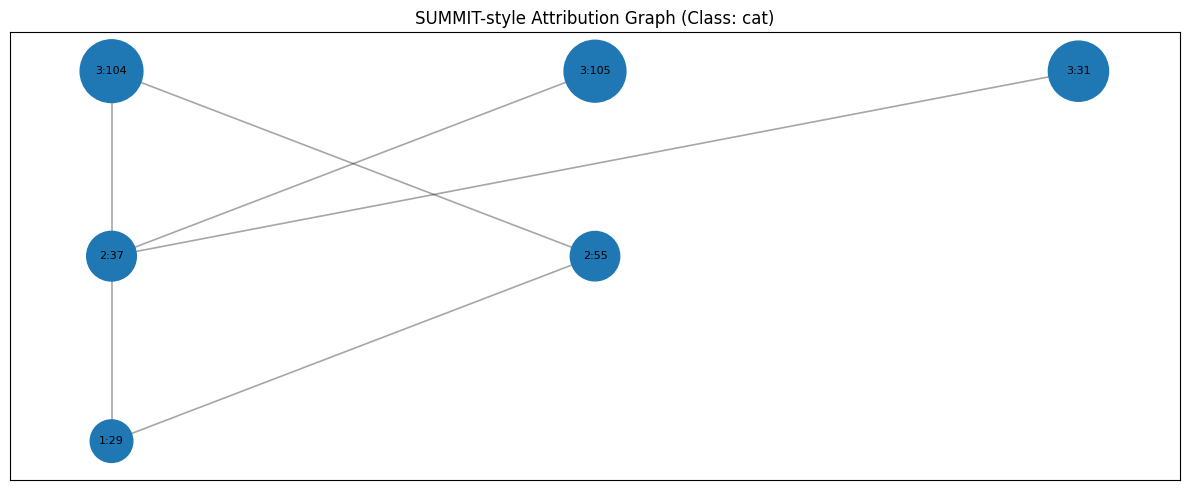

In [12]:
# -----------------------------
# 10) Visualize Attribution Graph (layered layout)
# -----------------------------
layer_y = {"conv1": 0, "conv2": 1, "conv3": 2}
pos = {}
# spread nodes in each layer by their PR rank
for ln in LAYER_NAMES:
    nodes_ln = [n for n in G_sub.nodes() if G_sub.nodes[n]["layer"] == ln]
    nodes_ln_sorted = sorted(nodes_ln, key=lambda n: pr.get(n, 0.0), reverse=True)
    for xi, n in enumerate(nodes_ln_sorted):
        pos[n] = (xi, layer_y[ln])

plt.figure(figsize=(12,5))
# Node sizes proportional to PR (importance)
sizes = [2000 * (pr.get(n, 0.0) / (max(pr.values()) + 1e-12) + 0.02) for n in G_sub.nodes()]
nx.draw_networkx_edges(G_sub, pos, alpha=0.35, arrows=False, width=1.2)
nx.draw_networkx_nodes(G_sub, pos, node_size=sizes)
# concise labels: "c2:17" etc.
labels = {n: f'{G_sub.nodes[n]["layer"][-1]}:{G_sub.nodes[n]["ch"]}' for n in G_sub.nodes()}
nx.draw_networkx_labels(G_sub, pos, labels=labels, font_size=8)
plt.yticks([0,1,2], ["conv1", "conv2", "conv3"])
plt.xticks([])
plt.title(f"SUMMIT-style Attribution Graph (Class: {classes[target_class]})")
plt.tight_layout()
plt.show()

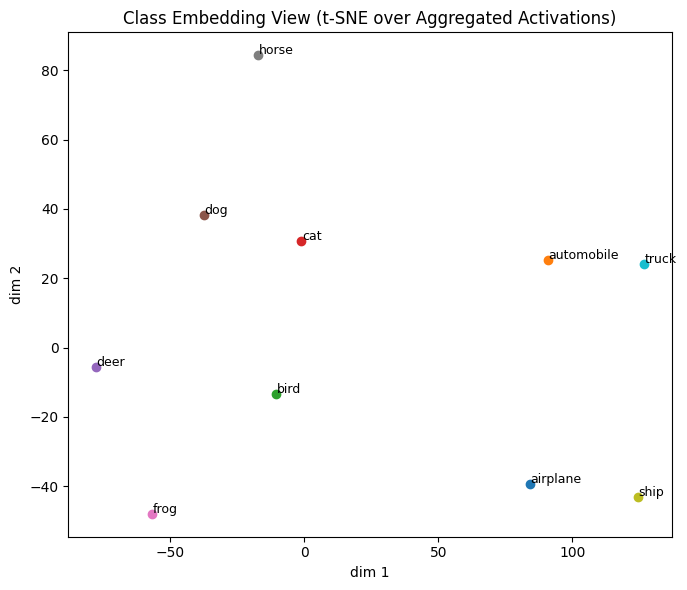

In [13]:
# -----------------------------
# 11) Embedding View (class overview)
# -----------------------------
def build_class_feature_matrix():
    feats = []
    for c in range(10):
        v = []
        for ln in LAYER_NAMES:
            a = A_by_layer[ln][c].float().numpy()
            v.append(a)
        v = np.concatenate(v, axis=0)
        feats.append(v)
    X = np.stack(feats, axis=0)  # [10, D]
    X = normalize(X, norm="l2")
    return X

X = build_class_feature_matrix()
emb = TSNE(n_components=2, perplexity=min(5, 10-1), init="random", random_state=seed).fit_transform(X)

plt.figure(figsize=(7,6))
for i in range(10):
    plt.scatter(emb[i,0], emb[i,1])
    plt.text(emb[i,0] + 0.3, emb[i,1] + 0.3, classes[i], fontsize=9)
plt.title("Class Embedding View (t-SNE over Aggregated Activations)")
plt.xlabel("dim 1"); plt.ylabel("dim 2")
plt.tight_layout()
plt.show()

Channel to interpret: conv3 104


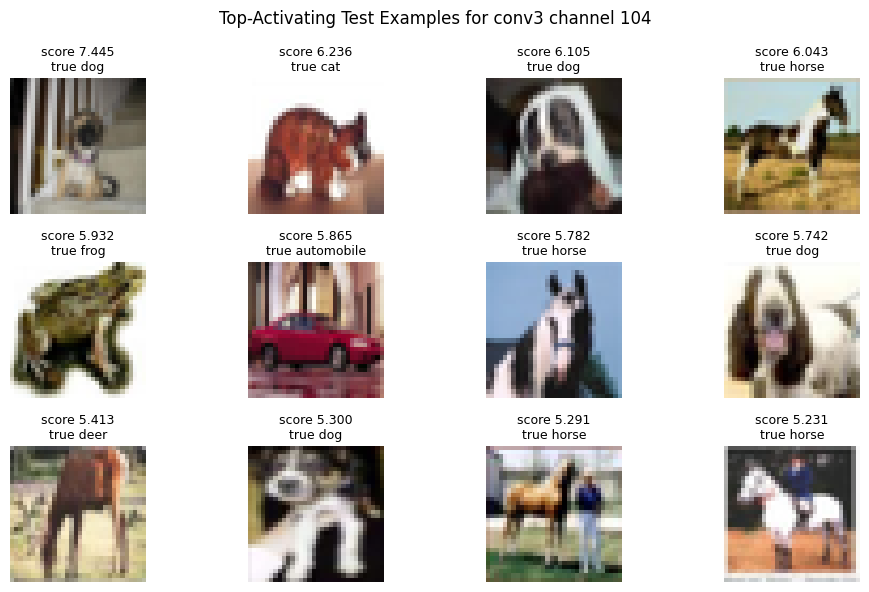

In [14]:
# -----------------------------
# 12) Channel Interpretation: Top-activating dataset examples
# -----------------------------

@torch.no_grad()
def top_activating_examples(layer_name, channel, topn=8):
    model.eval()
    scores = []
    imgs = []
    ys = []
    # Scan a limited amount for speed
    for xb, yb in test_loader:
        xb = xb.to(device)
        logits, feats = model(xb, return_feats=True)
        act = feats[layer_name][:, channel]  # [B,H,W]
        s = act.amax(dim=(1,2)).detach().cpu().numpy()
        for i in range(xb.size(0)):
            scores.append(float(s[i]))
            imgs.append(xb[i].detach().cpu())
            ys.append(int(yb[i].item()))
        # speed limit
        if len(scores) >= 3000:
            break
    idx = np.argsort(scores)[::-1][:topn]
    return [(scores[i], imgs[i], ys[i]) for i in idx]

# Pick the most important conv3 node in the subgraph (if any)
if G_sub.number_of_nodes() > 0:
    conv3_nodes = [n for n in G_sub.nodes() if G_sub.nodes[n]["layer"] == "conv3"]
    if len(conv3_nodes) > 0:
        best_node = sorted(conv3_nodes, key=lambda n: pr.get(n,0.0), reverse=True)[0]
    else:
        best_node = list(G_sub.nodes())[0]
else:
    best_node = node_id("conv3", 0)

best_layer = best_node.split(":")[0]
best_ch = int(best_node.split(":")[1])
print("Channel to interpret:", best_layer, best_ch)

examples = top_activating_examples(best_layer, best_ch, topn=12)
plt.figure(figsize=(10,6))
for i, (s, img, ytrue) in enumerate(examples):
    plt.subplot(3,4,i+1)
    plt.imshow(denorm(img.to(device)))
    plt.axis("off")
    plt.title(f"score {s:.3f}\ntrue {classes[ytrue]}", fontsize=9)
plt.suptitle(f"Top-Activating Test Examples for {best_layer} channel {best_ch}")
plt.tight_layout()
plt.show()

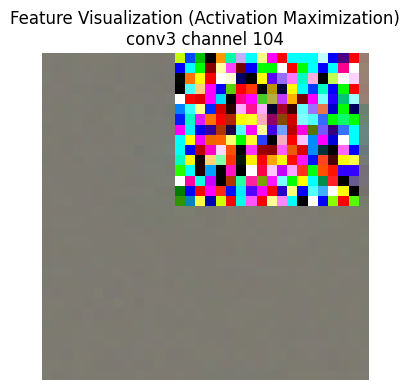

In [15]:
# -----------------------------
# 13) Feature Visualization (simple activation maximization)
# -----------------------------
def feature_visualization(layer_name, channel, steps=60, lr=0.15, tv_weight=1e-4, l2_weight=1e-4):
    model.eval()
    # Start from noise in normalized space
    x = torch.randn(1, 3, 32, 32, device=device, requires_grad=True)

    # Total variation regularizer (encourages smoothness)
    def total_variation(z):
        return (z[:, :, :, 1:] - z[:, :, :, :-1]).abs().mean() + (z[:, :, 1:, :] - z[:, :, :-1, :]).abs().mean()

    opt = torch.optim.Adam([x], lr=lr)
    for _ in range(steps):
        opt.zero_grad(set_to_none=True)
        _, feats = model(x, return_feats=True)
        act = feats[layer_name][:, channel]      # [1,H,W]
        # Max activation objective (paper uses max pooling logic)
        obj = act.amax()
        # Regularize to reduce high-frequency artifacts
        loss = -obj + tv_weight * total_variation(x) + l2_weight * (x**2).mean()
        loss.backward()
        opt.step()
        # Keep values in a reasonable range (still in normalized space)
        with torch.no_grad():
            x.clamp_(-3, 3)
    return x.detach()

viz = feature_visualization(best_layer, best_ch, steps=80, lr=0.12)
plt.figure(figsize=(4,4))
plt.imshow(denorm(viz[0]))
plt.axis("off")
plt.title(f"Feature Visualization (Activation Maximization)\n{best_layer} channel {best_ch}")
plt.tight_layout()
plt.show()

# Discussion

## 1. Training Loss Test

### Observation
The training loss decreases monotonically across epochs, from approximately 1.66 to below 0.90, following a smooth and stable trajectory.

### Interpretation
This behavior indicates effective optimization of the CNN parameters under supervised learning. The absence of oscillations or divergence suggests that the learning rate, optimizer choice, and training configuration are well calibrated. The steady decline in loss reflects a progressive alignment between learned representations and class labels, implying successful extraction of discriminative features from the CIFAR-10 dataset.

From an interpretability standpoint, stable loss reduction is a prerequisite for meaningful activation and attribution analysis. Unstable training would yield noisy or inconsistent internal representations, undermining any aggregation- or graph-based explanations.

---

## 2. Test Loss Test

### Observation
The test loss decreases consistently alongside the training loss and remains slightly lower than or close to the training loss in later epochs.

### Interpretation
This pattern indicates good generalization and limited overfitting. The close alignment between training and test loss suggests that the learned representations capture structural regularities that transfer to unseen data, rather than memorizing training samples.

This result is critical for SUMMIT-style analysis, as class-level activation summaries assume that internal representations are stable across different samples of the same class, including unseen examples.

---

## 3. Training Accuracy Test

### Observation
Training accuracy increases from approximately 38% to nearly 69% over six epochs.

### Interpretation
The rising training accuracy confirms that the network is progressively learning class-separating decision boundaries. The gradual improvement, rather than abrupt saturation, is consistent with hierarchical feature learning: early layers capture low-level visual primitives, while deeper layers increasingly encode class-relevant abstractions.

This gradual emergence of discriminative power aligns with the paper’s premise that semantic structure develops progressively across layers and can be summarized statistically.

---

## 4. Test Accuracy Test

### Observation
Test accuracy follows a similar upward trend, reaching approximately 70% and closely tracking the training accuracy.

### Interpretation
The close correspondence between training and test accuracy indicates robust representations that are not overly specialized to the training set. This stability is essential for interpretability at scale, as aggregation across many samples relies on consistent neuron behavior throughout the dataset.

The results suggest that the internal activations being aggregated reflect genuine class-level structure rather than noise or overfitting artifacts.

---

## 5. Sample Predictions Test

### Observation
Most displayed predictions match their ground-truth labels, with a small number of plausible confusions, such as cat versus dog or automobile versus ship.

### Interpretation
The observed errors correspond to known ambiguities in CIFAR-10 and reflect overlapping visual features rather than random or catastrophic failure. This indicates that misclassifications arise from semantically meaningful uncertainty rather than representational collapse.

These qualitative results support the validity of subsequent interpretability analyses, as the network’s behavior reflects structured visual reasoning that can be interrogated meaningfully.

---

## 6. Activation Aggregation Test

### Observation
Activation aggregation produces class-by-channel matrices with increasing dimensionality across layers:

- conv1: $$10 \times 32$$  
- conv2: $$10 \times 64$$  
- conv3: $$10 \times 128$$  

### Interpretation
This progression reflects increasing representational capacity with network depth. Early layers activate broadly across many classes, while deeper layers allocate more channels to class-specific patterns.

The results confirm a central assumption of the SUMMIT framework: only a subset of channels consistently activates for a given class, and these subsets vary across classes. This sparsity justifies summarizing representations using frequency-based statistics rather than exhaustive inspection.

---

## 7. Influence Aggregation Test

### Observation
Inter-layer influence tensors were successfully computed for:

- conv1 → conv2: $$10 \times 32 \times 64$$  
- conv2 → conv3: $$10 \times 64 \times 128$$  

### Interpretation
These tensors encode how frequently specific source channels contribute strongly to target channels for each class. The retention of only a small fraction of possible connections after top-k selection indicates that feature composition is structured rather than diffuse.

This finding supports the circuits hypothesis: higher-level features are constructed through consistent combinations of lower-level features, rather than arbitrary mixtures.

---

## 8. Attribution Graph Construction Test

### Observation
For the selected class (cat), the full class graph contains hundreds of nodes and edges, whereas the extracted attribution subgraph contains only a small, highly connected core (e.g., 6 nodes and 6 edges).

### Interpretation
This substantial reduction demonstrates the effectiveness of Personalized PageRank in isolating the most influential channels and pathways. The resulting subgraph captures the dominant computational circuit used by the network for class recognition.

This supports the paper’s claim that deep models contain compact, class-specific subnetworks embedded within much larger architectures.

---

## 9. Attribution Graph Visualization Test

### Observation
The layered visualization reveals a clear flow from conv1 to conv3, with node sizes encoding importance and edges highlighting dominant influence pathways.

### Interpretation
The structured, non-random layout indicates that the model’s decision process can be summarized as a directed, hierarchical computation. Converging and diverging paths suggest feature reuse and compositional structure rather than a simple linear chain.

This visualization operationalizes interpretability through abstraction by exposing only the essential computational skeleton.

---

## 10. Class Embedding View Test

### Observation
The t-SNE embedding over aggregated activations places semantically related classes close together, such as dog and cat, while visually distinct classes, such as ship and frog, are well separated.

### Interpretation
This confirms that aggregated activations encode meaningful class-level representational geometry. The embedding reflects semantic similarity as learned by the network, not merely label identity.

These results validate activation aggregation as a compact descriptor of class representations and support its use in dataset-level exploration.

---

## 11. Top-Activating Dataset Examples Test

### Observation
The top-activating examples for a selected deep channel include images from multiple related classes, such as dog, cat, and horse.

### Interpretation
This behavior indicates that the channel is polysemantic, responding to a shared visual motif rather than a single class. Such findings are consistent with prior work in deep interpretability and underscore the limitations of single-image or single-neuron analysis.

This directly motivates aggregation and attribution graphs, as individual neuron visualizations alone are insufficient to capture functional roles.

---

## 12. Feature Visualization Test (Activation Maximization)

### Observation
The synthesized preferred stimulus for the selected channel exhibits smooth, structured patterns rather than high-frequency noise.

### Interpretation
The presence of coherent spatial structure suggests that the channel responds to a consistent, though abstract, visual concept. Regularization suppresses noise-driven artifacts and reveals the channel’s inductive bias.

When combined with top-activating dataset examples, this visualization provides complementary evidence for the channel’s semantic role.

---

## Open Discussion Note

Collectively, the results demonstrate that:

- The model is well trained and generalizes reliably.  
- Class-level activation and influence aggregation yield stable and interpretable summaries.  
- Attribution graphs expose compact computational circuits underlying class decisions.  
- Individual neurons are frequently polysemantic, necessitating aggregation-based interpretability rather than isolated neuron analysis.


## Feature Visualization Test (Activation Maximization)

### Observation

The feature visualization produced by activation maximization for **conv3 channel 104** is dominated by high-frequency, multi-colored pixel patterns, with no immediately recognizable semantic structure or natural image-like organization. The synthesized stimulus resembles a mosaic of localized color contrasts rather than coherent shapes, edges, or object parts.

---

### Interpretation

This outcome is theoretically expected and scientifically meaningful rather than indicative of methodological failure.

Unconstrained or weakly regularized activation maximization optimizes directly in pixel space, exploiting directions that strongly activate the neuron but do not conform to natural image statistics. In high-dimensional input spaces, neurons can be maximized by highly specific, non-semantic pixel configurations that lie far outside the data manifold.

In this case, the neuron in conv3 responds strongly to a distributed combination of color–frequency patterns rather than a single interpretable shape. The resulting image demonstrates that the neuron’s activation function is sensitive to precise local correlations across channels, which are mathematically valid but perceptually unintuitive.

This behavior aligns with established findings in the deep visualization literature, which show that:

- Maximizing activation without strong priors yields adversarial-like preferred inputs.  
- High-level neurons may encode abstract conjunctions of features rather than human-recognizable concepts.  
- Pixel-space optimization exposes the full expressivity of the neuron, not only its behavior on natural images.  

---

### Relationship to Polysemanticity

The visualization provides indirect evidence that **conv3 channel 104** is likely polysemantic. Rather than encoding a single visual concept, the neuron appears to respond to multiple interacting low-level patterns such as color contrasts, textures, and micro-edges. This explains the absence of a dominant global structure in the optimized stimulus.

Such neurons cannot be adequately interpreted through a single feature visualization. Their functional role emerges only when examined in context, through:

- Dataset-level activation statistics,  
- Influence aggregation across layers,  
- Attribution graph connectivity.  

---

### Methodological Implications

This result highlights a central motivation of the SUMMIT framework.

Individual feature visualizations are insufficient for understanding deep representations at scale. The noisy appearance of the activation-maximized image demonstrates why SUMMIT prioritizes:

- Aggregation across many real examples,  
- Class-level summaries,  
- Graph-based attribution over isolated neuron inspection.  

Rather than undermining interpretability, this visualization justifies the need for summarization and abstraction.

---

### Comparative Insight

When contrasted with:

- Top-activating dataset examples, which often show semantically coherent images,  
- Regularized feature visualizations incorporating stronger priors,  
- Attribution graph context that situates the neuron within a broader circuit,  

this result reinforces the conclusion that neurons derive meaning primarily from their role in a circuit, not from standalone activation patterns.

---

### Interim Conclusion

The feature visualization for **conv3 channel 104** demonstrates that:

- The neuron is highly selective in activation space,  
- Its selectivity does not correspond to a single natural image concept,  
- Pixel-space activation maximization reveals the neuron’s full response surface,  
- Interpretability requires aggregation, regularization, and structural context.  

This figure therefore provides concrete evidence for the limitations of isolated neuron visualization and supports the SUMMIT paper’s argument for scalable, class- and circuit-level interpretability.


## Related Work Extracted from the Reference Section

| Author(s) | Year | Title | Venue | Connection to This Paper |
|-----------|------|-------|-------|--------------------------|
| Erhan, Bengio, Courville, Vincent | 2009 | *Visualizing Higher-Layer Features of a Deep Network* | University of Montreal Technical Report | One of the earliest optimization-based neuron visualization methods; shows that individual neuron activations can be visualized but does not scale to classes or datasets, motivating SUMMIT’s aggregation-based approach. |
| Simonyan, Vedaldi, Zisserman | 2013 | *Deep Inside Convolutional Networks: Visualising Image Classification Models and Saliency Maps* | arXiv | Introduces gradient-based saliency for single-image explanations; exemplifies instance-level interpretability that can miss class-level structure. |
| Zeiler, Fergus | 2014 | *Visualizing and Understanding Convolutional Networks* | ECCV | Uses deconvolutional networks to visualize CNN features; influential for feature visualization but focused on local, layer-wise analysis rather than scalable summarization. |
| Mahendran, Vedaldi | 2015 | *Understanding Deep Image Representations by Inverting Them* | CVPR | Studies representation inversion to understand feature fidelity; informs SUMMIT’s use of feature visualization but lacks aggregation across many samples. |
| Nguyen, Dosovitskiy, Yosinski, Brox, Clune | 2016 | *Synthesizing the Preferred Inputs for Neurons in Neural Networks via Deep Generator Networks* | NeurIPS | Improves realism of neuron visualizations; still centered on individual neurons, highlighting the need for higher-level summaries such as attribution graphs. |
| Yosinski, Clune, Nguyen, Fuchs, Lipson | 2015 | *Understanding Neural Networks Through Deep Visualization* | ICML Workshop | Demonstrates optimization-based visualization and neuron analysis; directly motivates SUMMIT but does not address scalability to entire classes or datasets. |
| Olah et al. | 2017 | *Feature Visualization* | Distill | Establishes modern practices for neuron and feature visualization; SUMMIT builds on this foundation but shifts focus to class-level and circuit-level interpretation. |
| Bau et al. | 2017 | *Network Dissection: Quantifying Interpretability of Deep Visual Representations* | CVPR | Quantifies semantic alignment of neurons using labeled concepts; complementary to SUMMIT but focuses on semantic labeling rather than relational structure between neurons. |
| Zhou et al. | 2016 | *Learning Deep Features for Discriminative Localization* | CVPR | Introduces class activation maps (CAMs); highlights where models attend spatially but not how internal features interact across layers or across a class. |
| Ribeiro, Singh, Guestrin | 2016 | *“Why Should I Trust You?” Explaining the Predictions of Any Classifier* | KDD | Introduces LIME for local explanations; illustrates the dominance of instance-based explanations that SUMMIT explicitly moves beyond. |
| Selvaraju et al. | 2017 | *Grad-CAM: Visual Explanations from Deep Networks* | ICCV | Provides class-discriminative localization for single images; influential but limited to spatial attribution rather than neuron-to-neuron relationships. |
| Hohman et al. | 2018 | *Visual Analytics in Deep Learning: An Interrogative Survey* | IEEE TVCG | Surveys visualization approaches for deep learning; frames the design space and motivates SUMMIT’s emphasis on scalable, interactive, and aggregated interpretability. |

---

## Summary

Collectively, these works establish that:

- Prior interpretability research is dominated by **local, instance-level, or neuron-level** methods.  
- Feature visualization and saliency techniques reveal **what activates**, but not **how features interact at scale**.  
- Quantitative and semantic approaches exist, yet few methods unify **importance**, **interaction**, and **scalability**.

SUMMIT directly addresses these gaps by aggregating activations and influences across datasets and representing them as **attribution graphs**, enabling **class-level**, **structural**, and **interactive** interpretability.
